Multiclass classification on MNIST

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

np.set_printoptions(precision=2)

The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=0}^{N-1}{e^{z_k} }} \tag{1}$$

Where $z = \mathbf{w} \cdot \mathbf{x} + b$ and N is the number of feature/categories in the output layer.  

In [27]:
def my_softmax(z):  
    """ Softmax converts a vector of values to a probability distribution.
    Args:
      z (ndarray (N,))  : input data, N features
    Returns:
      a (ndarray (N,))  : softmax of z
    """    
    a=np.zeros(len(z))
    e_z=np.exp(z)
    sum=np.sum(e_z)
    for i in range(len(z)):
        a[i]=e_z[i]/sum
    return a

In [28]:
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.03 0.09 0.24 0.64]
tensorflow softmax(z): [0.03 0.09 0.24 0.64]


In [29]:
X = np.load(r"C:\Users\Tibi\Desktop\notebooks\tf and np digit recognition\X.npy")
y = np.load(r"C:\Users\Tibi\Desktop\notebooks\tf and np digit recognition\y.npy")

In [30]:
print(X.shape,y.shape)

(5000, 400) (5000, 1)


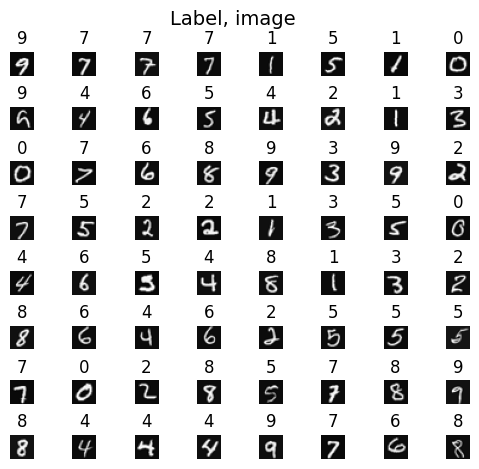

In [31]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [32]:
tf.random.set_seed(1234) # for consistent results
model = tf.keras.Sequential([tf.keras.Input(shape=(400,)),
                             Dense(units=25,activation='relu'),
                             Dense(units=15,activation='relu'),
                             Dense(units=10,activation='linear')],
                             name='my_model')

In [33]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
[layer1, layer2, layer3] = model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (400, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


In [35]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # indicates the softmax should be included with the  loss calculation by adding `from_logits=True`
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - loss: 1.9442 
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.7325
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 0.4597
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - loss: 0.3587
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.3063
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.2730
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 0.2479
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.2278
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.2111
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.1968
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.1843
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 564us/step - loss: 0.1732
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 577us/step - loss: 0.1631
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - loss: 0.1544
Epoch 15/40
157/157 ━━━━━━━━

In [36]:
def plot_loss_tf(history):
    fig,ax = plt.subplots(1,1, figsize = (4,3))
    ax.plot(history.history['loss'], label='loss')
    ax.set_ylim([0, 2])
    ax.set_xlabel('Epoch')
    ax.set_ylabel('loss (cost)')
    ax.legend()
    ax.grid(True)
    plt.show()

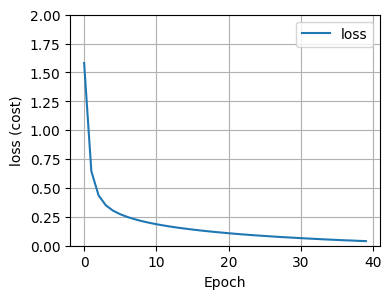

In [37]:
plot_loss_tf(history)

In [39]:
history.history['loss']

[1.5818599462509155,
 0.6447774767875671,
 0.43614089488983154,
 0.35010942816734314,
 0.30350935459136963,
 0.2725355923175812,
 0.2487000823020935,
 0.2293357402086258,
 0.21284250915050507,
 0.198697030544281,
 0.18616332113742828,
 0.17521823942661285,
 0.16503924131393433,
 0.15606006979942322,
 0.1479489952325821,
 0.14002712070941925,
 0.13273294270038605,
 0.12600676715373993,
 0.1196637973189354,
 0.11387971043586731,
 0.10827881097793579,
 0.10279909521341324,
 0.09781837463378906,
 0.09311888366937637,
 0.08855423331260681,
 0.08442195504903793,
 0.080229252576828,
 0.07630354911088943,
 0.07277793437242508,
 0.06916307657957077,
 0.06558854877948761,
 0.062201306223869324,
 0.05911184847354889,
 0.05586709827184677,
 0.05291333049535751,
 0.05008635297417641,
 0.04716939851641655,
 0.0449279248714447,
 0.04211829602718353,
 0.03981218487024307]

In [46]:
def display_digit(X):
    """ display a single digit. The input is one digit (400,). """
    fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
    X_reshaped = X.reshape((20,20)).T
    # Display the image
    ax.imshow(X_reshaped, cmap='gray')
    plt.show()

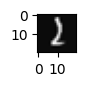

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
 predicting a Two: 
[[-10.15   0.84   3.36  -2.02  -8.01  -8.34  -5.41  -4.33  -3.8  -10.17]]
 Largest Prediction index: 2


In [47]:
image_of_two = X[1015]
display_digit(image_of_two)
prediction = model.predict(image_of_two.reshape(1,400))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

In [48]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[1.25e-06 7.40e-02 9.20e-01 4.26e-03 1.07e-05 7.62e-06 1.44e-04 4.20e-04
  7.19e-04 1.23e-06]]
Total of predictions: 1.000


In [49]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

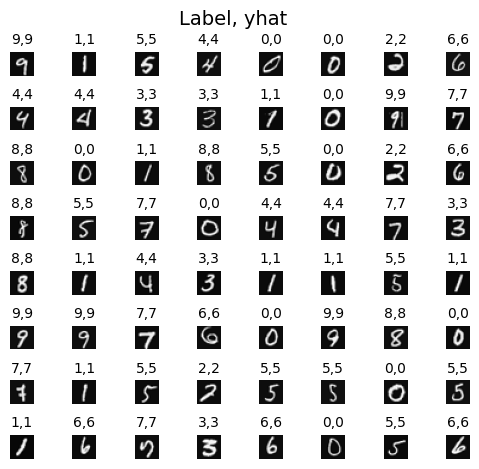

In [50]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [51]:
def display_errors(model,X,y):
    f = model.predict(X)
    yhat = np.argmax(f, axis=1)
    doo = yhat != y[:,0]
    idxs = np.where(yhat != y[:,0])[0]
    if len(idxs) == 0:
        print("no errors found")
    else:
        cnt = min(8, len(idxs))
        fig, ax = plt.subplots(1,cnt, figsize=(5,1.2))
        fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.80]) #[left, bottom, right, top]
        for i in range(cnt):
            j = idxs[i]
            X_reshaped = X[j].reshape((20,20)).T

            # Display the image
            ax[i].imshow(X_reshaped, cmap='gray')

            # Predict using the Neural Network
            prediction = model.predict(X[j].reshape(1,400))
            prediction_p = tf.nn.softmax(prediction)
            yhat = np.argmax(prediction_p)

            # Display the label above the image
            ax[i].set_title(f"{y[j,0]},{yhat}",fontsize=10)
            ax[i].set_axis_off()
            fig.suptitle("Label, yhat", fontsize=12)
    return(len(idxs))

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
34 errors out of 5000 images


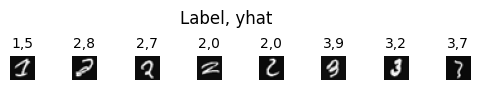

In [52]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")

In [ ]:
model.fit( # running for more epochs to decrease the loss. ideally we should split the dataset and test separetely on a train and test set
    X,y,   
    epochs=200
)

In [54]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step
no errors found
0 errors out of 5000 images
